# Monte Carlo Integration Calculator

### An Honors Project for Prof. Bognar's STAT:2020 by Aidan McGrane

The intuition behind Monte Carlo integration begins with the definition of the average value of a function $f$, which is given by:
$$\overline{f} = \frac{1}{b-a}\int_a^b f(x)dx$$

Our goal is to evaluate the integral, so we rearrange to get:
$$\int_a^b f(x)dx = (b-a)\cdot \overline{f}$$

So, we know that we can approximate the value of the integral by approximating the average value of the function.

The Monte Carlo approach to approximating $\overline{f}$ takes a sample of $N$ uniformly distributed independent random points over the interval $[a, b]$.

For each random point $X_i\in[a, b]$, we evaluate the function values at these points, giving us $f(X_1), f(X_2), \dots, f(X_N)$.

Taking the average of these function values provides our estimate of the true average function value, which can be described by:
$$\overline{f} \approx \frac{1}{N} \sum_{i=1}^{N}f(X_i)$$

>By the Law of Large Numbers, this sample mean approaches the true average function value as $N \to \infty$.

We can now update our previous integral formula to utilize this estimate, and we have the

 __Monte Carlo integration formula__:
$$\int_a^b f(x)dx \approx (b-a) \cdot \frac{1}{N} \sum_{i=1}^{N}f(X_i)$$

Implementing this formula in Python is a straightforward process with four steps.

1. Generate $N$ random points $X_1, X_2, \dots, X_N$ uniformly in the interval $[a, b]$.
2. Evaluate $f(X_i)$ for each point $X_i$.
3. Compute the average of these function values.
4. Multiply by $(b-a)$ to approximate the integral.

In [2]:
import numpy as np
#function to be integrated
def f(x):
    return (np.sin(x)) #we'll try f(x) = sin(x)

#integrates f(x) from a to b using N random samples
def monteCarloIntegration(a, b, N):
    xrand = np.random.uniform(a, b, N)  #1
    fxrand = f(xrand)                   #2
    averagefx = np.sum(fxrand) / N      #3
    answer = (b - a) * averagefx        #4
    return answer

> Note: `np.random.uniform(a, b, N)` technically uses the interval $[a, b)$, but $P(X_i=b)=0$ for $X_i\sim U[a, b]$ anyway, so this is fine.

Let's test it out! We know $\int_0^{2\pi} \sin(x)dx = 0$, so we can see how close our new calculator gets.

In [17]:
#inputs
a = 0
b = 2 * np.pi
N = 100000

monteCarloIntegration(a, b, N)

np.float64(-0.01986745172301726)

That seems pretty good. However, "seems pretty good" for a single trial isn't a great measure of performance.

So, we will analyze our estimation by looking at its distribution.

Our Monte Carlo integration estimate is a random variable, given by $I \sim \mathcal{N}\left(\mu_I, \sigma_I^2\right)$.

> We know it follows a Normal distribution using the Central Limit Theorem, because our sample size $N$ is much larger than 30, but we'll show it later.

#### Expected Value

Since each $X_i$ is i.i.d., each $f(X_i)$ is also i.i.d., which means that

 $\mathbb{E} \left[\sum_{i=1}^{N}f(X_i)\right] = N\cdot\mathbb{E}[f(X)]$.

So, the expected value of our integral estimate $I$ is given by $\mathbb{E}[I] = (b - a) \cdot \mathbb{E}[f(X)]$.

This relationship can be summarized by:

$$
\mathbb{E}[I] = \mu_I = (b - a) \cdot \mathbb{E}[f(X)] = \int_a^b f(x)dx
$$

#### Variance

Since the variance of a sum of independent variables is the sum of their variances, it follows that

 $\mathrm{Var} \left[\sum_{i=1}^{N}f(X_i)\right] = N\cdot\mathrm{Var}[f(X)]$.

$I$ is defined as $I = (b-a) \cdot \frac{1}{N} \sum_{i=1}^{N}f(X_i)$ from our Monte Carlo integration formula.

Applying the property that 
$\mathrm{Var} [cX] = c^2\mathrm{Var} [X]$ 
 to this equation gives 
$\mathrm{Var} [I] = \left(\frac{b-a}{N}\right)^2 \cdot N \cdot \mathrm{Var}[f(X)]$, which simplifies to:

$$\mathrm{Var} [I] = \sigma_I ^ 2 = \frac{(b-a)^2}{N} \cdot \mathrm{Var}[f(X)]$$

#### Distribution

We can now see that the distribution of $I$ is given by:

$$I \sim \mathcal{N}\left(\mu_I = (b - a) \cdot \mathbb{E}[f(X)], \sigma_I^2 = \frac{(b-a)^2}{N} \cdot \mathrm{Var}[f(X)]\right)$$

$\mu_I$ equals the value of the integral of our function $f$, as desired.

Variance is equivalent to squared error, so we can define our error as $\sigma_I = \sqrt{\frac{(b-a)^2 \cdot \mathrm{Var}[f(X)]}{N}}$.

$b$, $a$, and $\mathrm{Var}[f(X)]$ are all constant values based on inputs, so we can define a constant $c$ such that 
$c = (b-a)^2 \cdot \mathrm{Var}[f(X)]$.

This gives us $\sigma_I = \frac{\sqrt{c}}{\sqrt{N}}$.

Thus, it becomes clear that as we increase our sample size $N$, our error decreases at a rate proportional to $\sqrt{N}$.

Our convergence rate of $I$ can therefore be described as $$\mathcal{O}\left(\frac{1}{\sqrt{N}}\right)$$

Now, we have a fuller understanding of the accuracy of our Monte Carlo integration calculator.

#### Testing Results

With this computation done, we can now test to see if experimental results back up the answers we found.

Continuing with our example of $\int_0^{2\pi} \sin(x)dx$, we can run our calculator repeatedly, and see if results center around $0$ and match our calculated variance.

We can calculate the variance of $\sin(x)$ over the interval $[0,2\pi]$ as follows:

$$\begin{align}
\mathbb{E}[f(X)^2] &= \frac{1}{b-a}\int_a^b f^2(x)dx &=& \frac{1}{b-a}\int_a^b \sin^2(x)dx &=& \frac{1}{2} \\
(\mathbb{E}[f(X)])^2 &= \left(\frac{1}{b-a}\int_a^b f(x)dx\right)^2 &=& \left(\frac{1}{b-a}\int_a^b \sin(x)dx\right)^2 &=& 0 \\
\mathrm{Var}[f(X)] &= \mathbb{E}[f(X)^2] - (\mathbb{E}[f(X)])^2 &=& \frac{1}{2} - 0 &=& \frac{1}{2}
\end{align}$$

Now, we can find the variance of our integral estimate $I$ as:
$$\sigma_I^2 = \frac{(b-a)^2}{N} \cdot \mathrm{Var}[\sin(X)] = \frac{4\pi^2}{100000} \cdot \frac{1}{2} = \frac{\pi^2}{50000} \approx 0.000197392$$

So, we can write our distribution for $I$ for $\sin(x)$ as:
$$I \sim \mathcal{N}\left(\mu_I = 0, \sigma_I^2 = 0.000197392\right)$$

Let's check if our calculator closely matches this over $1000$ trials.

In [40]:
#same inputs as before
trials = np.zeros(1000)
for i in range(1000):
    trials[i] = monteCarloIntegration(a, b, N)

print("mean: ")
print(np.mean(trials))
print("var: ")
print(np.var(trials))

mean: 
3.6169760003265215e-05
var: 
0.00019692474804538764


We can see that it does!

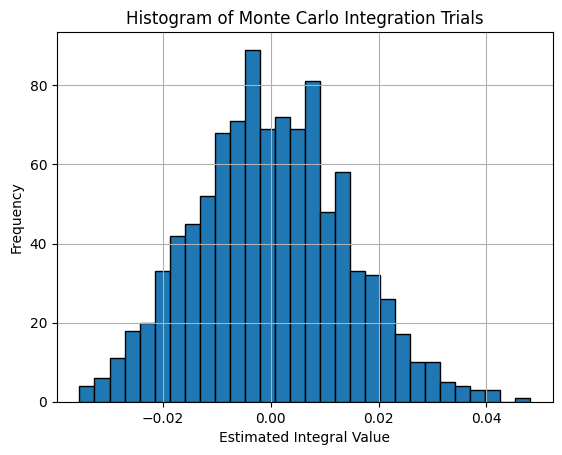

In [41]:
import matplotlib.pyplot as plt
#plot histogram
plt.hist(trials, bins=30, edgecolor='black')
plt.title("Histogram of Monte Carlo Integration Trials")
plt.xlabel("Estimated Integral Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Plotting our trials confirms our results visually, as we can clearly see a Normal Distribution curve centered around $0$.

Additionally, this Normal curve supports our use of the Central Limit Theorem!